## CODE HERE IS TO CALCUALTE THE TRIMMED MEAN USING INTERPOLATION

In [1]:
"""
CODE HERE IS TO CALCUALTE THE TRIMMED MEAN USING INTERPOLATION
"""
from typing import List, Tuple, Union
import numpy as np


def trim_list(list_given: List[int], decimal_percent: float) -> List[int]:
    """
    Given a list, make a copy of it and sort it in ascending order
    trim amount = Multiply the decimal percent by the length of the given list and round it
    Based on the trim amount, trim the copy of the list where 2 * trim amount = total items trimmed

    :param list_given: list to get trimmed
    :param decimal_percent: percentage to trim the given list by
    :return: trimmed copy of the list
    """
    list_temp = list_given.copy()
    list_temp.sort()
    amount_to_trim = round(decimal_percent * len(list_temp))

    while amount_to_trim != 0:
        list_temp.pop(0)
        list_temp.pop(-1)
        amount_to_trim -= 1

    return list_temp


def calculate_all_perfect_trimmed_means_and_percentages(list_given: List[int]) -> Tuple[List[float], List[float]]:
    """
    Given a list:
        Calculate number of trims
        Calculate all perfect trims

        Loop through all perfect trims:
            Calculate trimmed mean
            Add trimmed mean to list of trimmed means

    :param list_given: list of values
    :return: list_trimmed_mean_perfect, list_trim_percentage_perfect
    """
    # Sort the given list if not sorted
    list_given.sort()

    # List of trimmed means that can perfectly trim the given list
    list_trimmed_mean_perfect = []

    # Length of list
    length_list = len(list_given)

    # TODO: CAN BE OPTIMIZED BY GETTING HALF THE AMOUNT OF TRIMS HERE
    # Number of trims that will be made to the list
    number_of_trims = length_list if length_list % 2 else length_list - 1

    # List of what you can trim the given list by
    list_trim_numbers = list(map(lambda x: x + 1, range(number_of_trims)))

    # Calculate the percentages that can split the given list perfectly upto 50%
    list_trim_percentage_perfect = [
        x for i in list_trim_numbers if (x := float(i / length_list)) <= .5]

    # Loop through each percentage (perfect trim percentage)
    for i in range(len(list_trim_percentage_perfect)):

        # Result of a trimmed list by given percentage
        list_trimmed_temp = trim_list(
            list_given, list_trim_percentage_perfect[i])

        # If trimmed list if empty, ignore it
        if not list_trimmed_temp:
            continue

        # Trimmed mean
        mean_trimmed = np.mean(list_trimmed_temp) * .01

        # Add trimmed mean to list of trimmed means that can perfectly trim the given list
        list_trimmed_mean_perfect.append(mean_trimmed)

    return list_trimmed_mean_perfect, list_trim_percentage_perfect


def trimmed_mean_interpolation(list_given: List[int], decimal_percent: float) -> Union[np.float64, float]:
    """
    Calculates the trimmed mean regardless of whether or not the given decimal percent can trim the the given list
    perfectly.

    If the decimal percent is not perfect then:
        Calculate left and right interpolated bounds
        Calculate the alpha
        Calculate the trimmed mean via interpolated bounds method

    Notes:
        Recall equation for finding alpha where the decimal percent is not perfect
            PERCENT = alpha(LEFT_BOUND_PERCENT) + (1 - alpha)(RIGHT_BOUND_PERCENT)
            Solve for alpha


        Recall equation for trimmed mean where decimal percent is not perfect
            TRIMMED_MEAN =  alpha(LEFT_BOUND_TRIMMED_MEAN_PERFECT) + 1 - alpha)(RIGHT_BOUND_TRIMMED_MEAN_PERFECT)
            Solve for TRIMMED_MEAN

    :param list_given: list of numbers
    :param decimal_percent: percentage to trim the list by
    :return:
    """

    # Calculate all perfect trims and their corresponding percentages
    list_trimmed_mean_perfect, list_trim_percentage_perfect = calculate_all_perfect_trimmed_means_and_percentages(
        list_given)

    # If the given decimal trim is a perfect trim
    if decimal_percent in list_trimmed_mean_perfect:
        return np.mean(trim_list(list_given, decimal_percent))

    # Index Bounds where the given decimal percent is in between
    index_left_bound, index_right_bound = _find_interpolated_weights(decimal_percent,
                                                                     list_trim_percentage_perfect)

    # Numerator for solving alpha
    numerator = decimal_percent - \
        list_trim_percentage_perfect[index_right_bound]

    # Denominator for solving alpha
    denominator = (list_trim_percentage_perfect[index_left_bound]) - (
        list_trim_percentage_perfect[index_right_bound])

    # Alpha (Floating point error here)
    alpha = (numerator / denominator)

    # Left and Right bound interpolation for solving the trimmed mean (Floating point errors here too)
    left_bound_interpolation = (
        alpha * list_trimmed_mean_perfect[index_left_bound])
    right_bound_interpolation = (1 - alpha) * \
        list_trimmed_mean_perfect[index_right_bound]

    # Calculate trimmed mean via interpolated method
    trimmed_mean = (left_bound_interpolation + right_bound_interpolation) * 100

    return trimmed_mean


def _find_interpolated_weights(value: float, list_in_between_sorted: List[float]) -> Tuple[int, int]:
    """
    Finds where the given value is in between the given list that is ASSUMED to be sorted
    Returns the indices where the value is in between in the given list

    WARNING:
        Dangerous, it assumes index + 1 exists

    :param value: value that should be in between list_in_between_sorted
    :param list_in_between_sorted: given list
    :return:
    """
    # Indices
    index_left_bound = None
    index_right_bound = None

    # Current index
    index = 0

    try:
        # Loop to check where the given value is in between
        while True:
            if value >= list_in_between_sorted[index]:
                index_left_bound = index

            if value <= list_in_between_sorted[index + 1]:
                index_right_bound = index + 1

            # If the bounds are found return it
            if index_left_bound is not None and index_right_bound is not None:
                return index_left_bound, index_right_bound

            index += 1
    except IndexError as e:
        print(e)
        print("Index is out of bounds. Is the given value in between any of the values in the given list?")

# 1. DEVORESTAT9 1.E.033.S.

In [2]:
import rpy2
%load_ext rpy2.ipython

c:\users\joseph\appdata\local\programs\python\python38\lib\site-packages\rpy2\robjects\packages.py:365: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


### The May 1, 2009, issue of a certain publication reported the following home sale amounts for a sample of homes in Alameda, CA that were sold the previous month (1,000s of $).


In [3]:
"""
The May 1, 2009, issue of a certain publication reported the following home sale amounts for a sample of homes in Alameda, CA that were sold the previous month (1,000s of $).
"""
string_data = "586	814	572	610	348	1,280	412	541	555	681"

list_data = string_data.split(sep="\t")

list_data = [int(i.replace(",", "")) for i in list_data]

list_data.sort()

print(list_data)

[348, 412, 541, 555, 572, 586, 610, 681, 814, 1280]


### (a) Calculate and interpret the sample mean and median.

In [4]:
"""
(a) Calculate and interpret the sample mean and median.
"""
import numpy as np
print("(a) Calculate and interpret the sample mean and median.")

mean = np.mean(list_data)
median = np.median(list_data)

print(f"{mean=}")
print(f"{median=}")

(a) Calculate and interpret the sample mean and median.
mean=639.9
median=579.0


In [5]:
%%R -i list_data

# R solution
list_data <- as.numeric(list_data)

print(mean(list_data))
print(median(list_data))

[1] 639.9
[1] 579


### (b) Suppose the 6th observation had been 985 rather than 1,280. How would the mean and median change?

In [6]:
"""
(b) Suppose the 6th observation had been 985 rather than 1,280. How would the mean and median change?
"""
print("(b) Suppose the 6th observation had been 985 rather than 1,280. How would the mean and median change?")

list_data_2 = [(i if i != 1280 else 985) for i in list_data]
print(list_data_2)
print()

mean = np.mean(list_data_2)  # why use np.mean, because of c speed!
median = np.median(list_data_2)
print(f"{mean=}")
print(f"{median=}")

(b) Suppose the 6th observation had been 985 rather than 1,280. How would the mean and median change?
[348, 412, 541, 555, 572, 586, 610, 681, 814, 985]

mean=610.4
median=579.0


In [7]:
%%R -i list_data_2

# R solution
list_data_2 <- as.numeric(list_data_2)

print(mean(list_data_2))
print(median(list_data_2))

[1] 610.4
[1] 579


### (c) Calculate a 20% trimmed mean by first trimming the two smallest and two largest observations. (Round your answer to the nearest hundred dollars.)

In [8]:
"""
(c) Calculate a 20% trimmed mean by first trimming the two smallest and two largest observations. (Round your answer to the nearest hundred dollars.)
"""
print("(c) Calculate a 20% trimmed mean by first trimming the two smallest and two largest observations. (Round your answer to the nearest hundred dollars.)")

list_new = trim_list(list_data, .20)
print(list_new)
# Multiple by 1000 because it's not in 1,000s of $
print("{:.0f}".format(np.mean(list_new) * 1000))

(c) Calculate a 20% trimmed mean by first trimming the two smallest and two largest observations. (Round your answer to the nearest hundred dollars.)
[541, 555, 572, 586, 610, 681]
590833


In [9]:
%%R -i list_data

# R solution
list_data < - as.numeric(list_data)

print(mean(list_data, trim=0.2))
# Multiple by 1000 because it's not in 1,000s of $
print(round(mean(list_data, trim=0.2) * 1000))

[1] NA
[1] NA


### (d) Calculate a 15% trimmed mean. (Round your answer to the nearest hundred dollars.)


In [10]:
"""
(d) Calculate a 15% trimmed mean. (Round your answer to the nearest hundred dollars.)
"""
print("(d) Calculate a 15% trimmed mean. (Round your answer to the nearest hundred dollars.)")

trimmed_mean_via_interpolation = trimmed_mean_interpolation(list_data, .15)
print(list_data)
print("{:.0f}".format(trimmed_mean_via_interpolation * 1000))  # Multiple by 1000 because it's not in 1, 000s of $

(d) Calculate a 15% trimmed mean. (Round your answer to the nearest hundred dollars.)
[348, 412, 541, 555, 572, 586, 610, 681, 814, 1280]
593604


In [11]:
%%R
# R SOLUTION NOT POSSIBLE UNLESS YOU CODE IT WHICH IS GOING TO BE DIFFICULT

NULL


# 2. DEVORESTAT9 1.E.035.MI.S.

In [12]:
import re
string_data_2 = """
0.20	0.21	0.26	0.30	0.35	0.41	0.54	0.57
1.43	1.70	1.82	2.20	2.24	3.06	3.26"""

list_data_2 = re.split("\t|\n", string_data_2)
list_data_2 = [i for i in list_data_2 if i != ""]
list_data_2 = list(map(float, list_data_2))
print(list_data_2)

[0.2, 0.21, 0.26, 0.3, 0.35, 0.41, 0.54, 0.57, 1.43, 1.7, 1.82, 2.2, 2.24, 3.06, 3.26]


(<Figure size 540x126 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x000001E077D571C0>)


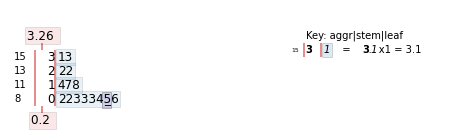

In [13]:
import stemgraphic

# Positive Skew
print(stemgraphic.stem_graphic(list_data_2, scale=1))

### (a) Determine the values of the sample mean and sample median. Hint: xi = 18.55. (Round your answers to four decimal places.)


In [14]:
"""
(a) Determine the values of the sample mean and sample median. Hint: xi = 18.55. (Round your answers to four decimal places.)
"""
print("(a) Determine the values of the sample mean and sample median. Hint: xi = 18.55. (Round your answers to four decimal places.)")

mean = np.mean(list_data_2)
median = np.median(list_data_2)
print("mean: {:.4f}".format(mean))
print("median: {}".format(median))

(a) Determine the values of the sample mean and sample median. Hint: xi = 18.55. (Round your answers to four decimal places.)
mean: 1.2367
median: 0.57


In [15]:
%%R -i list_data_2

# R Solution
list_data_2 <- as.numeric(list_data_2)

print(mean(list_data_2))
print(median(list_data_2))

[1] 1.236667
[1] 0.57


### (b) Determine the value of the 10% trimmed mean. (Round your answer to four decimal places.)


In [16]:
"""
(b) Determine the value of the 10% trimmed mean. (Round your answer to four decimal places.)
"""
print("(b) Determine the value of the 10% trimmed mean. (Round your answer to four decimal places.)")

trimmed_mean_via_interpolation_2 = trimmed_mean_interpolation(list_data_2, .10)
print("Trimmed mean: {:.4f}".format(trimmed_mean_via_interpolation_2))

(b) Determine the value of the 10% trimmed mean. (Round your answer to four decimal places.)
Trimmed mean: 1.1177


#### calculate_how_much_value_change_without_affected_median

In [17]:
"""
calculate_how_much_value_change_without_affected_median
"""


def calculate_how_much_value_change_without_affected_median(value_observed: float, list_given: list, add_amount: float):
    list_given_copy = list_given.copy()
    index = list_given.index(value_observed)
    current_median = np.median(list_given)

    while True:
        list_given_copy[index] += add_amount

        new_median = np.median(list_given_copy)
        if current_median != new_median:
            print(f"Median Current: {current_median}")
            print(f"Median New: {new_median}")
            return list_given_copy[index] - list_given[index]

### (c) By how much could the observation 0.20 be increased without impacting the value of the sample median?

In [18]:
"""
(c) By how much could the observation 0.20 be increased without impacting the value of the sample median?
"""
print("(c) By how much could the observation 0.20 be increased without impacting the value of the sample median?")
print("Increase:", calculate_how_much_value_change_without_affected_median(.2, list_data_2, .01))

(c) By how much could the observation 0.20 be increased without impacting the value of the sample median?
Median Current: 0.57
Median New: 0.5700000000000003
Increase: 0.3700000000000003


# 3. DEVORESTAT9 1.E.039.S.

In [19]:
"""
The propagation of fatigue cracks in various aircraft parts has been the subject of extensive study in recent years. The accompanying data consists of propagation lives (flight hours/104) to reach a given crack size in fastener holes intended for use in military aircraft.
"""
string_data_3 = """
0.738   	0.852   	0.870   	0.909   	0.923   	0.938   	0.968   	1.009   
1.039   	1.052   	1.083   	1.119   	1.135   	1.162   	1.227   	1.357 
"""
list_data_3 = re.split("\t|\n", string_data_3)
list_data_3 = [i for i in list_data_3 if i != ""]
list_data_3 = list(map(float, list_data_3))
print(list_data_3)

[0.738, 0.852, 0.87, 0.909, 0.923, 0.938, 0.968, 1.009, 1.039, 1.052, 1.083, 1.119, 1.135, 1.162, 1.227, 1.357]


### (a) Compute and compare the values of the sample mean x and median x tilde. (Round your mean to four decimal places.)

In [20]:
"""
(a) Compute and compare the values of the sample mean x and median x tilde. (Round your mean to four decimal places.)
"""
print("(a) Compute and compare the values of the sample mean x and median x tilde. (Round your mean to four decimal places.)")

print("Mean: {:.4f}".format(np.mean(list_data_3)))
print("Median: {:.4f}".format(np.median(list_data_3)))

(a) Compute and compare the values of the sample mean x and median x tilde. (Round your mean to four decimal places.)
Mean: 1.0238
Median: 1.0240


In [21]:
%%R -i list_data_3

# R Solution
list_data_3 <- as.numeric(list_data_3)

print(mean(list_data_3))
print(median(list_data_3))

[1] 1.023813
[1] 1.024


### (b) By how much could the largest sample observation be decreased without affecting the value of the median? (Enter your answer to three decimal places.)


In [22]:
"""
(b) By how much could the largest sample observation be decreased without affecting the value of the median? (Enter your answer to three decimal places.)
"""
print("(b) By how much could the largest sample observation be decreased without affecting the value of the median? (Enter your answer to three decimal places.)")
print("Increase: {:.3f}".format(
    calculate_how_much_value_change_without_affected_median(1.357, list_data_3, -.0001)))

(b) By how much could the largest sample observation be decreased without affecting the value of the median? (Enter your answer to three decimal places.)
Median Current: 1.024
Median New: 1.0239500000000175
Increase: -0.318


# 4. DEVORESTAT9 1.E.047.S.

In [23]:
"""
Zinfandel is a popular red wine varietal produced almost exclusively in California. It is rather controversial among wine connoisseurs because its alcohol content varies quite substantially from one producer to another. In May 2013, the author went to a certain website, randomly selected 10 zinfandels from among the 325 available, and obtained the following values of alcohol content (%).
"""
string_data_4 = """

14.8	14.6	16.1	14.3	16.0
13.8	16.2	14.7	13.9	15.1

"""
list_data_4 = re.split("\t|\n", string_data_4)
list_data_4 = [i for i in list_data_4 if i != ""]
list_data_4 = list(map(float, list_data_4))
list_data_4.sort()
print(list_data_4)

[13.8, 13.9, 14.3, 14.6, 14.7, 14.8, 15.1, 16.0, 16.1, 16.2]


### (a) Calculate and interpret several measures of center

In [24]:
"""
(a) Calculate and interpret several measures of center
"""
print("(a) Calculate and interpret several measures of center")
print("Mean: {:.4f}".format(np.mean(list_data_4)))
print("Median: {:.4f}".format(np.median(list_data_4)))



(a) Calculate and interpret several measures of center
Mean: 14.9500
Median: 14.7500


In [25]:
%%R -i list_data_4

# R Solution
list_data_4 <- as.numeric(list_data_4)

print(mean(list_data_4))
print(median(list_data_4))

[1] 14.95
[1] 14.75


### (b) Calculate the sample variance using the defining formula. (Round your answer to three decimal places.)

In [26]:
"""
(b) Calculate the sample variance using the defining formula. (Round your answer to three decimal places.)
"""
print("(b) Calculate the sample variance using the defining formula. (Round your answer to three decimal places.)")
print("Sample Variance: {:.3f}".format(np.var(list_data_4, ddof=1)))  # ddof= 1 for sample variance

(b) Calculate the sample variance using the defining formula. (Round your answer to three decimal places.)
Sample Variance: 0.785


In [27]:
%%R -i list_data_4

# R Solution
list_data_4 <- as.numeric(list_data_4)

print(var(list_data_4))

[1] 0.785


### (c) Calculate the sample variance using the shortcut formula after subtracting 13 from each observation. (Round your answer to three decimal places.)

In [28]:
"""
(c) Calculate the sample variance using the shortcut formula after subtracting 13 from each observation. (Round your answer to three decimal places.)
"""
list_data_4_v2 = list(map(lambda x: x - 13 , list_data_4))
print(list_data_4_v2)
print("Sample Variance: {:.3f}".format(np.var(list_data_4_v2, ddof=1)))  # ddof= 1 for sample variance

[0.8000000000000007, 0.9000000000000004, 1.3000000000000007, 1.5999999999999996, 1.6999999999999993, 1.8000000000000007, 2.0999999999999996, 3.0, 3.1000000000000014, 3.1999999999999993]
Sample Variance: 0.785


In [29]:
%%R -i list_data_4_v2

# R Solution
list_data_4_v2 <- as.numeric(list_data_4_v2)

print(var(list_data_4_v2))

[1] 0.785


# 5. DEVORESTAT9 1.E.051.S.

In [30]:
"""
An article reported the following data on oxidation-induction time (min) for various commercial oils:
"""
string_data_5 = """

85  	102  	130  	160  	180  	195  	131  	145  	212  	105  	145  
151  	153  	135  	87  	99  	95  	119  	129  

"""
list_data_5 = re.split("\t|\n", string_data_5)
list_data_5 = [i for i in list_data_5 if i != ""]
list_data_5 = list(map(int, list_data_5))
list_data_5.sort()
print(list_data_5)

[85, 87, 95, 99, 102, 105, 119, 129, 130, 131, 135, 145, 145, 151, 153, 160, 180, 195, 212]


### (a) Calculate the sample variance and standard deviation. (Round your answers to four decimal places.)

In [31]:
"""
(a) Calculate the sample variance and standard deviation. (Round your answers to four decimal places.)
"""
print("(a) Calculate the sample variance and standard deviation. (Round your answers to four decimal places.)")

(a) Calculate the sample variance and standard deviation. (Round your answers to four decimal places.)


In [32]:
sample_variance_list_data_5 = np.var(list_data_5, ddof=1)
print("Sample Variance: {:.4f}".format(sample_variance_list_data_5))  # ddof= 1 for sample variance
print("Standard Deviation: {:.4f}".format(np.std(list_data_5, ddof=1)))  # ddof= 1 for sample variance
print("Standard Deviation V2: {:.4f}".format(np.sqrt(sample_variance_list_data_5)))


Sample Variance: 1276.5789
Standard Deviation: 35.7292
Standard Deviation V2: 35.7292


In [33]:
%%R -i list_data_5

# R Solution
list_data_5 <- as.numeric(list_data_5)

print(var(list_data_5))
print(sd(list_data_5))

[1] 1276.579
[1] 35.72924


In [34]:
"""
min_to_hour
"""
def min_to_hour(minutes):
    """Hour and Minutes"""
    hour = minutes // 60
    minutes_new = (minutes % 60) * .01
    return hour + minutes_new

def min_to_hour(minutes):
    """Hour and percentage of hour"""
    hour = minutes / 60
    return hour 

In [35]:
list_data_5_v2 = list(map(min_to_hour, list_data_5))
print(list_data_5_v2)

[1.4166666666666667, 1.45, 1.5833333333333333, 1.65, 1.7, 1.75, 1.9833333333333334, 2.15, 2.1666666666666665, 2.183333333333333, 2.25, 2.4166666666666665, 2.4166666666666665, 2.5166666666666666, 2.55, 2.6666666666666665, 3.0, 3.25, 3.533333333333333]


In [36]:
sample_variance_list_data_5_v2 = np.var(list_data_5_v2, ddof=1)
print("Sample Variance: {:.4f}".format(sample_variance_list_data_5_v2))  # ddof= 1 for sample variance
print("Standard Deviation: {:.4f}".format(np.std(list_data_5_v2, ddof=1)))  # ddof= 1 for sample variance
print("Standard Deviation V2: {:.4f}".format(np.sqrt(sample_variance_list_data_5_v2)))

Sample Variance: 0.3546
Standard Deviation: 0.5955
Standard Deviation V2: 0.5955


In [37]:
%%R -i list_data_5_v2

# R Solution
list_data_5_v2 <- as.numeric(list_data_5_v2)

print(var(list_data_5_v2))
print(sd(list_data_5_v2))

[1] 0.3546053
[1] 0.5954874


# 6. DEVORESTAT9 1.E.055.

In [38]:
"""
A sample of 26 offshore oil workers took part in a simulated escape exercise, resulting in the accompanying data on time (sec) to complete the escape. Here is a stem-and-leaf display of escape time data.
"""
import io

string_data_6 = """
32	55
33	49
34	
35	6699
36	34469
37	03345
38	3
39	2347
40	23
41	
42	5
"""
list_data_6 = []

x = (io.StringIO(string_data_6))

current_str = " "
while current_str:
    current_str = x.readline()
    base = current_str.split("\t")[0]

    sub_numbers = re.search("\t[0-9]+", current_str)

    if sub_numbers is None:
        continue

    for i in sub_numbers.group(0):
        if i == "\t":
            continue
        list_data_6.append(int(base + i))

list_data_6.sort()
print(list_data_6)
print(len(list_data_6))

[325, 325, 334, 339, 356, 356, 359, 359, 363, 364, 364, 366, 369, 370, 373, 373, 374, 375, 383, 392, 393, 394, 397, 402, 403, 425]
26


(<Figure size 540x252 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x000001E04749C640>)


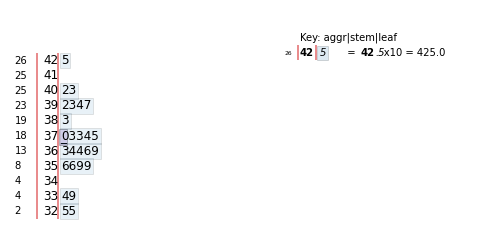

In [39]:
print(stemgraphic.stem_graphic(list_data_6, scale=10, ))

In [40]:
"""
find_forth_spread 
"""

def find_forth_spread(list_given):
    list_given.sort()

    length_list = len(list_given)
    split_size = int(length_list/2 if length_list % 2 == 0 else length_list//2 + 1.5)

    lower_half = list_given[:split_size]
    upper_half = list_given[-split_size:]

    lower_forth = np.median(lower_half)
    upper_forth = np.median(upper_half)

    forth_spread = upper_forth - lower_forth
    outlier_lower = lower_forth - 1.5*forth_spread
    outlier_upper = upper_forth + 1.5*forth_spread

    outlier_lower_ex = lower_forth - 3 * forth_spread
    outlier_upper_ex = upper_forth + 3 * forth_spread

    return forth_spread, lower_forth, upper_forth, outlier_lower, outlier_upper, outlier_lower_ex, outlier_upper_ex


def print_forth_spread(find_forth_spread_output):
    print("Forth Spread: {}".format(find_forth_spread_output[0]))
    print("Lower Forth: {}".format(find_forth_spread_output[1]))
    print("Upper Forth: {}".format(find_forth_spread_output[2]))
    print("Outlier Lower: {}".format(find_forth_spread_output[3]))
    print("Outlier Upper: {}".format(find_forth_spread_output[4]))
    print("Outlier Lower Ex: {}".format(find_forth_spread_output[5]))
    print("Outlier Upper Ex: {}".format(find_forth_spread_output[6]))

### (a) Determine the value of the fourth spread.

In [41]:
"""
(a) Determine the value of the fourth spread.
"""
print("(a) Determine the value of the fourth spread.")
print_forth_spread(find_forth_spread(list_data_6))

(a) Determine the value of the fourth spread.
Forth Spread: 33.0
Lower Forth: 359.0
Upper Forth: 392.0
Outlier Lower: 309.5
Outlier Upper: 441.5
Outlier Lower Ex: 260.0
Outlier Upper Ex: 491.0


### (b) Are there any outliers in the sample? Any extreme outliers?
### (c) Construct a boxplot.


(b) Are there any outliers in the sample? Any extreme outliers?
(c) Construct a boxplot.
Comment on its features.



{'whiskers': [<matplotlib.lines.Line2D at 0x1e079fad430>,
 'caps': [<matplotlib.lines.Line2D at 0x1e079fadaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e079fad0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e079fb71f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e079fb7550>],
 'means': []}

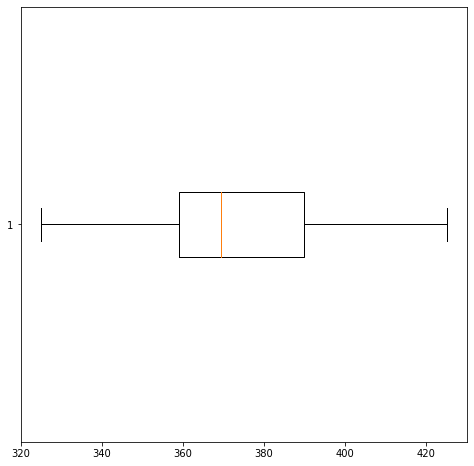

In [42]:
text="""
(b) Are there any outliers in the sample? Any extreme outliers?
(c) Construct a boxplot.
Comment on its features.
"""
print(text)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.boxplot(list_data_6, vert=False)  # Notice no outliers

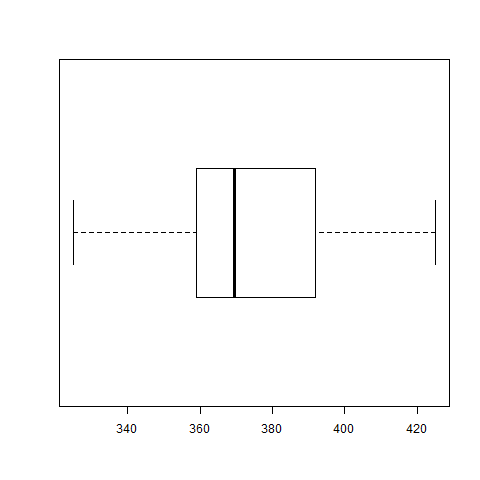

In [43]:
%%R -i list_data_6

# R Solution
list_data_6 <- as.numeric(list_data_6)

boxplot(list_data_6, horizontal=TRUE)

In [44]:
def calculate_how_much_value_be_changed_till_fourth_spread_change(value_to_change, list_given, value_add):
    list_given_copy = list_given.copy()

    current_forth_spread = find_forth_spread(list_given)
    index = list_given.index(value_to_change)

    new_forth_spread = current_forth_spread
    while current_forth_spread == new_forth_spread:
        list_given_copy[index] += value_add
        new_forth_spread = find_forth_spread(list_given_copy)

    return list_given[index] - list_given_copy[index]

### (d) By how much could the largest observation, currently 425, be decreased without affecting the value of the fourth spread?

In [45]:
"""
(d) By how much could the largest observation, currently 425, be decreased without affecting the value of the fourth spread?
"""

calculate_how_much_value_be_changed_till_fourth_spread_change(
    425, list_data_6, value_add=-1)

33

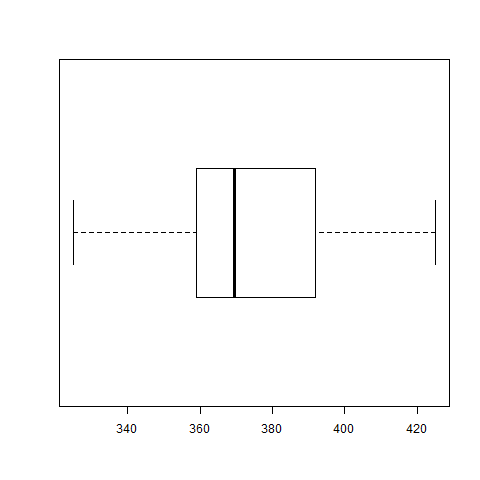

In [46]:
%%R -i list_data_6

# R Solution
list_data_6 <- as.numeric(list_data_6)

boxplot(list_data_6, horizontal=TRUE)

# 7. DEVORESTAT9 1.E.508.XP.

In [47]:
string_data_7 = """


  22.0  	  40.4  	  16.4  	  73.4  	  36.6  	  108.6  
  30.0  	  4.4  	  33.1  	  66.7  	  81.5  


"""
list_data_7 = re.split("\t|\n", string_data_7)
list_data_7 = [i for i in list_data_7 if i != ""]
list_data_7 = list(map(float, list_data_7))
list_data_7.sort()
print(list_data_7)

[4.4, 16.4, 22.0, 30.0, 33.1, 36.6, 40.4, 66.7, 73.4, 81.5, 108.6]


### (a) What are the values of the fourths? (Enter your answers to two decimal places.)
### (c) How large or small does an observation have to be to qualify as an outlier? (Round your answers to one decimal place.)

In [48]:
text = """
(a) What are the values of the fourths? (Enter your answers to two decimal places.)
(c) How large or small does an observation have to be to qualify as an outlier? (Round your answers to one decimal place.)
"""
print(text)
print_forth_spread(find_forth_spread(list_data_7))


(a) What are the values of the fourths? (Enter your answers to two decimal places.)
(c) How large or small does an observation have to be to qualify as an outlier? (Round your answers to one decimal place.)

Forth Spread: 44.05000000000001
Lower Forth: 26.0
Upper Forth: 70.05000000000001
Outlier Lower: -40.07500000000002
Outlier Upper: 136.12500000000003
Outlier Lower Ex: -106.15000000000003
Outlier Upper Ex: 202.20000000000005


### (b) Construct a boxplot based on the five-number summary.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e07a169d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e079fda490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e07a169a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e079fdab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e079fdaeb0>],
 'means': []}

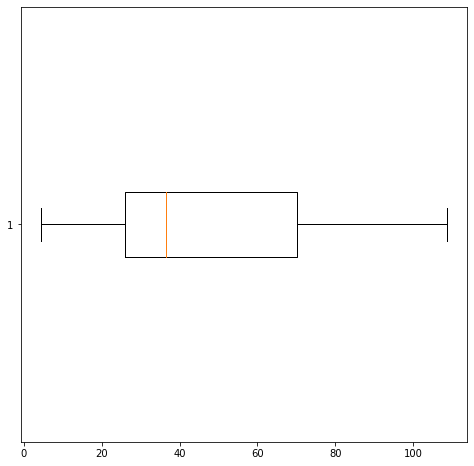

In [49]:
"""
(b) Construct a boxplot based on the five-number summary.
"""
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.boxplot(list_data_7, vert=False)

### Comment on its features. (Select all that apply.)


In [50]:
print("Mean: {}".format(np.mean(list_data_7)))
print("Mean: {}".format(np.median(list_data_7)))
print("Mean is ahead so skew positive")

Mean: 46.64545454545455
Mean: 36.6
Mean is ahead so skew positive


### (d) By how much could the largest observation be decreased without affecting fs?

In [51]:
"""
(d) By how much could the largest observation be decreased without affecting fs?

"""
print("(d) By how much could the largest observation be decreased without affecting fs?")
how_much = calculate_how_much_value_be_changed_till_fourth_spread_change(
    108.6, 
    list_data_7, 
    -.1)

print(how_much)



(d) By how much could the largest observation be decreased without affecting fs?
35.199999999999534
